In [1]:
!start .

# <font color =blue> Examen   </font>

Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:

- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería Examen1_LopezMichel.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

<font color = blue> - El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera. <font>


In [28]:
%matplotlib inline 

import sympy as sym
import numpy as np
import matplotlib.pylab as plt

from sympy import init_printing; init_printing(use_latex='mathjax')
from IPython.display import display
from IPython.display import HTML
from scipy.integrate import odeint

from sympy import *
from scipy.optimize import linprog


from ipywidgets import *

Ley_Newton_enfriamiento='<iframe src=https://es.wikipedia.org/wiki/Ley_del_enfriamiento_de_Newton?useformat=mobile width=700 height=350></iframe>'
Torricelli='<iframe src=https://en.wikipedia.org/wiki/Torricelli%27s_law?useformat=mobile width=700 height=350></iframe>'
Caidalibre ='<iframe src=https://es.wikipedia.org/wiki/Ca%C3%ADda_libre?useformat=mobile width=700 height=350></iframe>'

sym.var('k t x')

T = sym.Function('T')

# <font color =blue>Primer punto.</font>

## Introducción al problema. 

### Ley de Newton del enfriamiento

La ley empírica de Newton, relativa al enfriamiento de un objeto, se expresa con la ecuación diferencial lineal de primer orden

$$\frac{dT}{dt} = k(T - Tm) $$

donde $k$ es una constante de proporcionalidad, $T(t)$ es la temperatura del objeto cuando $t > 0$
y $T_m$ es la temperatura ambiente; o sea, la temperatura del medio que rodea al objeto. 

Supondremos que $T_m$ es constante.

### Para más información revise la siguiente pagina. 

In [3]:
HTML(Ley_Newton_enfriamiento)

HTML(value='<iframe src=https://es.wikipedia.org/wiki/Ley_del_enfriamiento_de_Newton?useformat=mobile width=70…

## <font color = red> Problema 1 <font>

### ¿Cuánto esperar para tomar el café?

Primero calentamos el agua a $80°C$. Posteriormente agregamos café al vaso con el agua caliente. Después realizamos la medición de la temperatura ambiente, la cual fue de $24°C$. Realiza las siguientes actividades:
]
1. (20 puntos) Simula el sistema en un tiempo de $0$ a $120$ unidades de tiempo  con una constante de proporcionalidad $k=-0.0565$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la temperatura es menor a $30°C$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para valores de $k >0$?
    - (5  puntos) Busca una constante de proporcionalidad $k$ en un rango ( de $-0.2$ a $0.2$ con incremento de 0.01), para la cual el cafe tiene una temperatura menor de $30°C$ en un tiempo a 20 minutos.

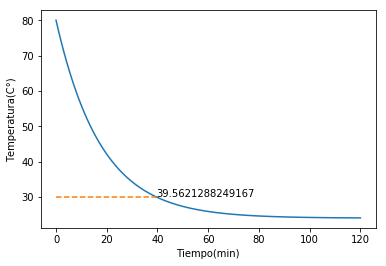

In [9]:
#Incisos 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
 
def f_T(k,t):
    return 56*np.exp(k*t) + 24
 
def f_t(k,T):
    return ln((T-24)/56)/k
 
k = -0.0565
t = np.linspace(0,120,120)
 
#print(f_t(k,35))
fig, axes=plt.subplots()
#axes.plot(k,sol,'--')
axes.plot(t,f_T(k,t))
axes.plot([0,f_t(k,29.99)],[29.99,29.99],'--')
axes.text(f_t(k,29.99),29.99,str(f_t(k,29.99)))
plt.xlabel('Tiempo(min)')
plt.ylabel('Temperatura(C°)')
plt.show()

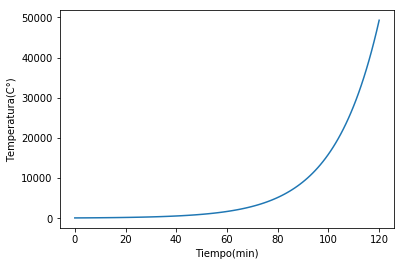

¿Qué interpetación puedes decir para valores de k>0? 
Que el cafe seguira calentandose y no se enfriará.

Rango de valores de k que cumplen con una temperatura menor que 30C° en 20 min. 

temperatura(C°): 25.025675777769113 	Valor de K: -0.2
temperatura(C°): 25.259204151818864 	Valor de K: -0.18974358974358976
temperatura(C°): 25.545902838230806 	Valor de K: -0.1794871794871795
temperatura(C°): 25.897877783994026 	Valor de K: -0.16923076923076924
temperatura(C°): 26.329991247768376 	Valor de K: -0.158974358974359
temperatura(C°): 26.860489363678823 	Valor de K: -0.14871794871794874
temperatura(C°): 27.511772590372015 	Valor de K: -0.13846153846153847
temperatura(C°): 28.31134157780174 	Valor de K: -0.12820512820512822
temperatura(C°): 29.29295839128153 	Valor de K: -0.11794871794871796


In [16]:
#Respuetsa al problema 1, inciso 3
k = 0.0565
fig, axes=plt.subplots()
axes.plot(t,f_T(k,t))
plt.xlabel('Tiempo(min)')
plt.ylabel('Temperatura(C°)')
plt.show()
print("¿Qué interpetación puedes decir para valores de k>0? \nQue el cafe seguira calentandose y no se enfriará.")
k = np.linspace(-0.2,0.2,40)
 
print('\nRango de valores de k que cumplen con una temperatura menor que 30C° en 20 min. \n')
for x in k:
    if f_T(x,20) < 30:
        print('temperatura(C°):',f_T(x,20),'\tValor de K:',x)

## <font color = red> Problema 2 <font>  

### ¿Cuánto esperar para comenzar a comer pastel?

Al sacar un pastel del horno, su temperatura es $280°C$. Después de $3$ minutos, $2OO°C$. ¿En cuanto tiempo se enfriará hasta la temperatura ambiente de $28°C$? Realiza las siguientes actividades:

1. (20 puntos) Simula el sistema en un tiempo de $0$ a $60$ unidades de tiempo  con una constante de proporcionalidad $k=-0.14518$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la temperatura es menor a $150°C$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para valores de $k >0$?
    - (5  puntos) Busca una constante de proporcionalidad $k$ en un rango ( de $-0.2$ a $0.2$ con incremento de 0.01), para la cual el pastel se puede comer a una temperatura menor a $50°C$ en un tiempo a 10 minutos.

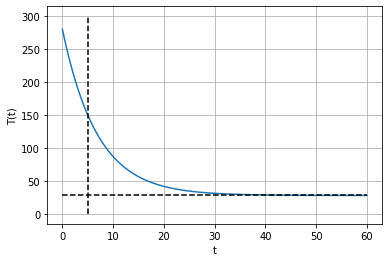

In [7]:
#Incisos 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

def fder(k,T):
    return k(T-28)

def f_T(k,t):
    return 252*np.exp(k*t) + 28

def f_t(k,T):
    return ln((T-28)/252)/k

k = -0.14518
t = np.linspace(0,60,60)

#print(f_t(k,35))
fig, axes=plt.subplots()
#axes.plot(k,sol,'--')
axes.plot(t,f_T(k,t))
axes.plot([0,f_t(k,149.99)],[149.99,149.99],'--')
axes.text(f_t(k,149.99),149.99,str(f_t(k,149.99)))
plt.xlabel('Tiempo(min)')
plt.ylabel('Temperatura(C°)')
plt.show()

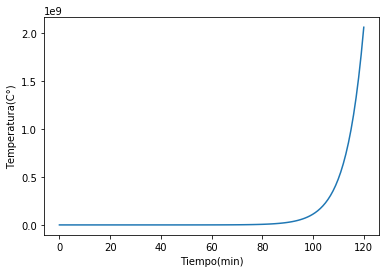

¿Qué interpetación puedes decir para valores de k>0: 
Que el pastel va seguir calentandose y no se enfriará.

Rango de valores de k que cumplen con una temperatura menor que 50C° en 10 min.

temperatura(C°): 31.57877586125031 	Valor de K: -0.2
temperatura(C°): 32.397346753698834 	Valor de K: -0.18974358974358976
temperatura(C°): 33.30433011779596 	Valor de K: -0.1794871794871795
temperatura(C°): 34.30927523658503 	Valor de K: -0.16923076923076924
temperatura(C°): 35.42276279518353 	Valor de K: -0.158974358974359
temperatura(C°): 36.65651628079441 	Valor de K: -0.14871794871794874
temperatura(C°): 38.023525414846034 	Valor de K: -0.13846153846153847
temperatura(C°): 39.53818291683096 	Valor de K: -0.12820512820512822
temperatura(C°): 41.21643603977797 	Valor de K: -0.11794871794871796
temperatura(C°): 43.075954472816704 	Valor de K: -0.1076923076923077
temperatura(C°): 45.13631637861726 	Valor de K: -0.09743589743589745
temperatura(C°): 47.41921452442213 	Valor de K: -0.0871794871794871

In [21]:
# Solucion opcion 3:
k = 0.14518
fig, axes=plt.subplots()
axes.plot(t,f_T(k,t))
plt.xlabel('Tiempo(min)')
plt.ylabel('Temperatura(C°)')
plt.show()
print("¿Qué interpetación puedes decir para valores de k>0: \nQue el pastel va seguir calentandose y no se enfriará.")
k = np.linspace(-0.2,0.2,40)

print('\nRango de valores de k que cumplen con una temperatura menor que 50C° en 10 min.\n')
for x in k:
    if f_T(x,10) <= 50:
        print('temperatura(C°):',f_T(x,10),'\tValor de K:',x)

print('\n Ningun valor de K de -0.2 a 0.2 cumple con los requisitos. Siendo este valor de k=0.2 como el mejor opción de constante.')

# <font color =blue>Segundo punto.</font>

## Introducción al problema. 

### Caída libre

En la caída libre ideal, se desprecia la resistencia aerodinámica que presenta el aire al movimiento del cuerpo, analizando lo que pasaría en el vacío. En esas condiciones, la aceleración que adquiriría el cuerpo sería debida exclusivamente a la gravedad, siendo independiente de su masa.

$$
\begin{eqnarray}
\frac{ds}{dt} &=& v \\
\frac{dv}{dt} &=& -g
\end{eqnarray}
$$

O visto el sistema en forma canónica

$$
\begin{eqnarray}
\dot{x}_1 &=& x_2 \\
\dot{x}_2 &=& -g
\end{eqnarray}
$$


### Para más información revise la siguiente pagina. 

In [3]:
HTML(Caidalibre)

HTML(value='<iframe src=https://es.wikipedia.org/wiki/Ca%C3%ADda_libre?useformat=mobile width=700 height=350><…

## <font color = red> Problema 3 <font>

### Deja caer una pelota

Desde un edificio de altura de $314$ metros se deja caer una pelota, que tarda 8 segundos en llegar al piso. ¿con que velocidad impacta la pelota contra el piso?


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $8$ unidades de tiempo  con una constante de gravedad $g=-9.8$,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un segundo. ¿En que tiempo aproximadamente la pelota esta a la mitad del edificio?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir para una posicion inicial de $314 m$ y una velocidad de $30 m/s$ ?
    - (5  puntos) ¿Que altura aproximadamente tendra en $10s$ para el incisio anterior?





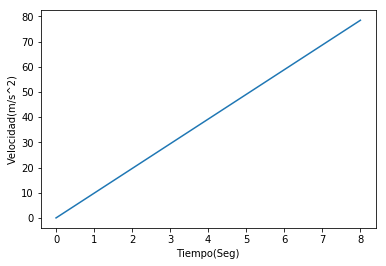

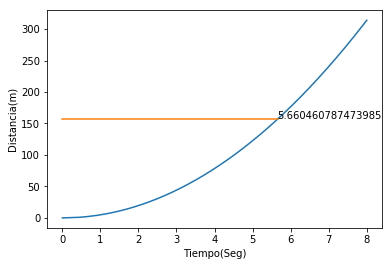

In [23]:
#Incisos 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

def velocity(g,h):
    return np.sqrt(2*g*h)

def time(g,h):
    return np.sqrt((2*h)/g)

g= 9.8
h=np.linspace(0,314,314)
vo= 30
t = np.linspace(0,8,8)
tf = np.linspace(0,10,10)

fig, axes=plt.subplots()
axes.plot(time(g,h),velocity(g,h))
plt.xlabel('Tiempo(Seg)')
plt.ylabel('Velocidad(m/s^2)')
plt.show()

fig, axes=plt.subplots()
axes.plot(time(g,h),h)
axes.plot([0,time(g,157)],[157,157])
axes.text(time(g,157),157,str(time(g,157)))
plt.xlabel('Tiempo(Seg)')
plt.ylabel('Distancia(m)')
plt.show()

In [25]:
# Solucion opcion 3

print("¿Qué interpretación puedes decir para una posicion inicial de 314𝑚 y una velocidad de 30𝑚/𝑠? \nConsiderando una altura y una velocidad inicial distintas a cero, el tiro sería vertical.")

print("\n¿Que altura aproximadamente tendra en 10𝑠 para el incisio anterior?")
h= 314+(vo*10)-(g*10**2)/2
print(h,"m")

¿Qué interpretación puedes decir para una posicion inicial de 314𝑚 y una velocidad de 30𝑚/𝑠? 
Considerando una altura y una velocidad inicial distintas a cero, el tiro sería vertical.

¿Que altura aproximadamente tendra en 10𝑠 para el incisio anterior?
123.99999999999994 m


# <font color =blue>Tercer punto.</font>

## Introducción al problema. 

## Drenado de un tanque (Ley de Torricelli)

En hidrodinámica, la ley de Torricelli establece que la velocidad
$v$ de flujo de salida de agua a través de un orificio plano ubicado en la parte inferior
de un tanque lleno hasta una altura $h$ será igual a la velocidad que un cuerpo (en este caso
una gota de agua) adquiriría en caída libre desde una altura $h$; es decir, $v = \sqrt{2gh}$, donde $g$ es la aceleración debida a la gravedad.


Suponga que un tanque lleno de agua puede drenar mediante un orificio bajo la influencia de la gravedad. Deseamos encontrar la altura $h$ del agua restante en el tanque en el tiempo $t$.

Si el área del orificio es $A_h$ (en $m^2$) y la velocidad del agua que sale del tanque es $v = \sqrt{2gh}$ (en m/s), entonces el volumen del agua que abandona el tanque por segundo es $A_h \sqrt{2gh}$ (en $m^3$/s). De este modo, si $V(t)$ indica el volumen del agua que hay en el tanque en el tiempo $t$, la ecuación diferencial deseada para la altura del agua en el tiempo t:

$$\frac{dh}{dt} = - \frac{A_h}{A_w} \sqrt{2gh} $$


Donde $A_w$ (en $m^2$) representa el área constante de la superficie superior del agua.

Observe que aquí ignoramos la posibilidad de fricción en el orificio, la cual puede ocasionar una reducción en la velocidad del flujo en
dicho lugar



### Para más información revise la siguiente pagina. 

In [4]:
HTML(Torricelli)

HTML(value='<iframe src=https://en.wikipedia.org/wiki/Torricelli%27s_law?useformat=mobile width=700 height=350…

## <font color = red> Problema 4 <font>

### Drenado de un tanque 

Concidere un cilindro circular con un área constante de $A_w = 5 m^2$, en la parte inferior contiene un orificio de área $A_h = 1 m^2$ el cual podemos estar regulando la salida del liquido. En el interior del tanque se encuentra un liquido el cual tiene una altura inicial en el tiempo $0$ de $h(0)= 10 m$. Realiza las siguientes actividades:

1. (20 puntos) Simula el sistema en un tiempo de $0$ a $6.5$ unidades de tiempo,  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) Supoga que cada unidad de tiempo corresponde a un minuto. ¿En que tiempo aproximadamente la altura del liquido alcanza una altura de $h=2 m$?
3. (15 puntos)
    - (10 puntos) ¿Qué interpretación puedes decir si el signo de la ecuación fuera positivo?
    - (5  puntos)  ¿Si el área del orificio $A_h$ es menor a $1 m^2$ que implicaria? Realiza una simulacion y grafica la solución para un orificio de $A_h = .5 m$ 

C:\Users\OEM\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


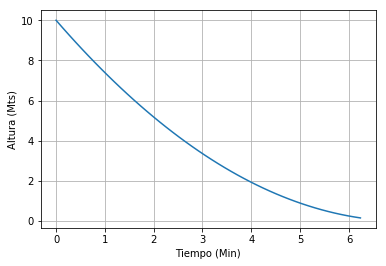

La altura llegará a 2 mt cuando el tiempo sea aproximadamente 4 min, se puede comprobar observando la gráfica.


In [30]:
#Incisos 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
def tanque(Ah, Aw, h0):
    g = 9.81
    def velocidad(h,t):
        return -(Ah/Aw)*np.sqrt(2*g*h)
    t = np.linspace(0,6.5)
    h_t = odeint(velocidad,h0,t)
    
    plt.plot(t,h_t)
    plt.xlabel('Tiempo (Min)')
    plt.ylabel('Altura (Mts)')
    plt.grid()
    plt.show()
tanque(1,5,10)
print("La altura llegará a 2 mt cuando el tiempo sea aproximadamente 4 min, se puede comprobar observando la gráfica.")

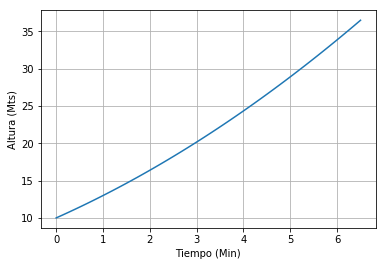

Si el signo de la función es positivo el se estará ganando volumen o se estará llenando.


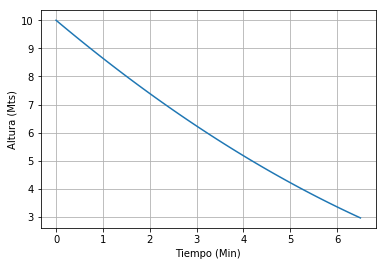

si el horificio es más pequeño podemos observar en al gráfica de la simulación que el vaciado del tanque será más lento.


In [33]:
#Inciso 3
def tanquePositivo(Ah, Aw, h0):
    g = 9.81
    def velocidad(h,t):
        return (Ah/Aw)*np.sqrt(2*g*h)
    t = np.linspace(0,6.5)
    h_t = odeint(velocidad,h0,t)
    
    plt.plot(t,h_t)
    plt.xlabel('Tiempo (Min)')
    plt.ylabel('Altura (Mts)')
    plt.grid()
    plt.show()
tanquePositivo(1,5,10)
print("Si el signo de la función es positivo el se estará ganando volumen o se estará llenando.")

tanque(0.5,5,10)
print("si el horificio es más pequeño podemos observar en al gráfica de la simulación que el vaciado del tanque será más lento.")


## <font color = red> Problema 5 <font>

### Modelo poblacional 

Simula la siguiente ecuación, y supoga que cada unidad de tiempo corresponde a un minuto.

$$\frac{ds}{dt} = 0.05s(\frac{s}{20}-1)(1-\frac{s}{100}) $$


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $200$ unidades de tiempo, con la condición inicial $s(0) = 21$  
2. (15 puntos) 
    - (10 puntos) Grafique la solución.
    - (5 puntos) ¿En que tiempo aproximadamente la poblacion alcanza su maxima capacidad?
3. (15 puntos)
    - (5 puntos) ¿Cual es la capacidad de soporte de este modelo poblacional?
    - (10  puntos) ¿Que pasa con una condición inicial menor (s(0)=21) ? ¿Y con una condición mayor a la capacidad de soporte? 

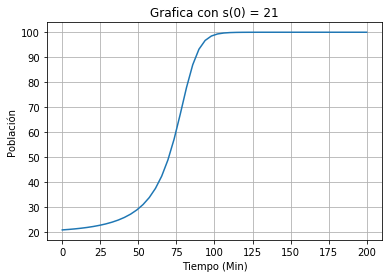

Observando la gráfica se puede ver que la población llega a su máxima capacidad a los 105 minutos aproximadamente.


In [37]:
#Inciso 1 y 2
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
def poblacion(s0,title):
    def crecimiento(s,t):
        return 0.05*s*((s/20)-1)*(1-(s/100))
    t = np.linspace(0,200)
    s_t = odeint(crecimiento,s0,t)
    
    plt.plot(t,s_t)
    plt.xlabel('Tiempo (Min)')
    plt.ylabel('Población')
    plt.title(title)
    plt.grid()
    plt.show()
poblacion(21,'Grafica con s(0) = 21')
print("Observando la gráfica se puede ver que la población llega a su máxima capacidad a los 105 minutos aproximadamente.")

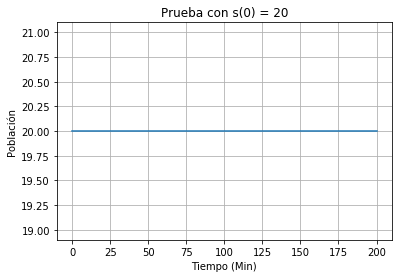

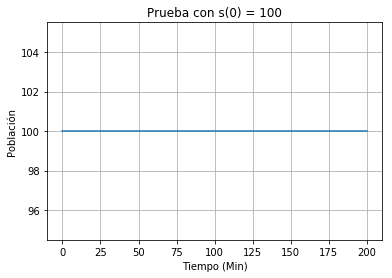

El rango de la población que se debería de manejar es entre 20 y 100 y nos dado una capacidad de 80


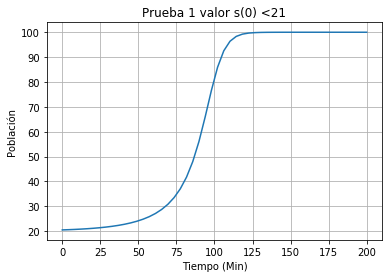

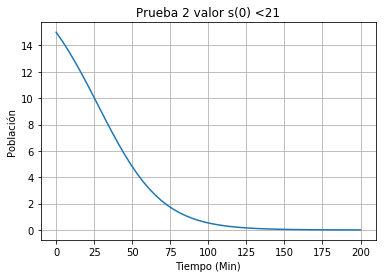

Al dar un valor inicial s(0) <21 se incrementa el tiempo para llegar a la capacidad máxima, pero si reducimos s(0) <20 
nuestro sistema no funciona.


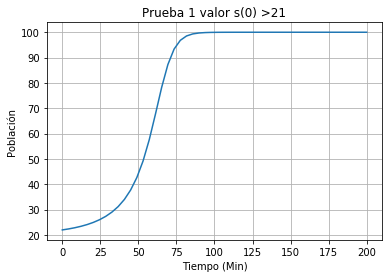

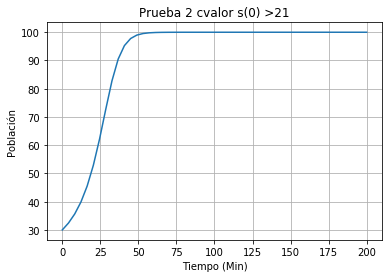

Si incrementamos s(0) >21 se disminuye el tiempo para llegar a la capacidad máxima, si pasamos los s(0) >100 
nuestro sistema no funciona.


In [39]:
#Respuesta inciso 3
poblacion(20, 'Prueba con s(0) = 20')
poblacion(100, 'Prueba con s(0) = 100')
print("El rango de la población que se debería de manejar es entre 20 y 100 y nos dado una capacidad de 80")
poblacion(20.5, 'Prueba 1 valor s(0) <21')
poblacion(15, 'Prueba 2 valor s(0) <21')
print('Al dar un valor inicial s(0) <21 se incrementa el tiempo para llegar a la capacidad máxima, pero si reducimos s(0) <20 \nnuestro sistema no funciona.')
poblacion(22, 'Prueba 1 valor s(0) >21')
poblacion(30, 'Prueba 2 cvalor s(0) >21')
print('Si incrementamos s(0) >21 se disminuye el tiempo para llegar a la capacidad máxima, si pasamos los s(0) >100 \nnuestro sistema no funciona.')

## <font color = red> Problema 6 (estabilizar el sistema)<font>

Diseña una función $u$ diferente de 0, para que el siguiente sistema no crezca, y se aproxime a 0 cuando t -> $\infty$.


$$\frac{ds}{dt} = 0.06u $$


1. (20 puntos) Simula el sistema en un tiempo de $0$ a $800$ unidades de tiempo, con la condición inicial $s(0) = 10$  
2. (15 puntos) 
    - (15 puntos) Grafique la solución.
3. (15 puntos)
    - (15 puntos) Escriba la ecuación de $u$ utilizada

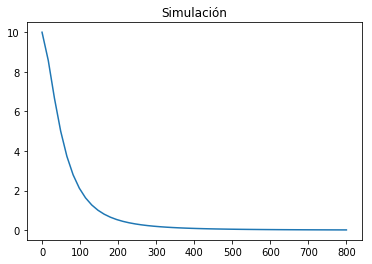

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
def ds(s0):
    def cambio(s,t):
        u=-0.027*s*np.sqrt(s*t*0.5)
        return 0.06*u
    t = np.linspace(0,800)
    s_t = odeint(cambio,s0,t)
    
    plt.plot(t,s_t)
    plt.title('Simulación')
    plt.show()
    
ds(10)

## <font color = red> Problema 7 <font>

Diseña una función $u$ diferente de 0, para que el siguiente sistema no crezca, y se aproxime a 0 cuando t -> $\infty$.


$$\frac{dx}{dt} = 2x^2 + 0.06u $$


1. (20 puntos) Simula el sistema con la condición inicial $x(0) = 10$  
2. (15 puntos) 
    - (15 puntos) Grafique la solución.
3. (15 puntos)
    - (15 puntos) Escriba la ecuación de $u$ utilizada

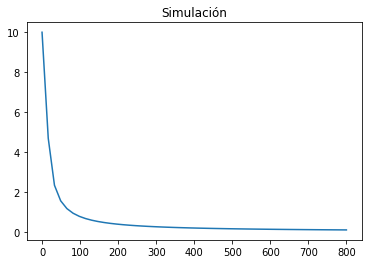

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
def dx(x0):
    def cambio(x,t):
        u=-40*x*np.sqrt(x*t*0.5)
        return 2*x*np.exp(2)+0.06*u
    t = np.linspace(0,800)
    x_t = odeint(cambio,x0,t)
    
    plt.plot(t,x_t)
    plt.title('Simulación')
    plt.show()
    
dx(10)

## <font color = red> Problema 8 (seguimiento de trayectorias) <font>

Diseña una función $u$ diferente de 0, para que el siguiente sistema siga una trayectoria. 


$$\frac{dx}{dt} = 2x^2 + 0.06u $$


1. (20 puntos) Simula el sistema con la condición inicial $x(0) = 10$  
2. (15 puntos) 
    - (15 puntos) Grafique la solución siguiendo la funcion de referencia $ x_{ref} = sin(t) $
3. (15 puntos)
    - (15 puntos) Escriba la ecuación de $u$ utilizada

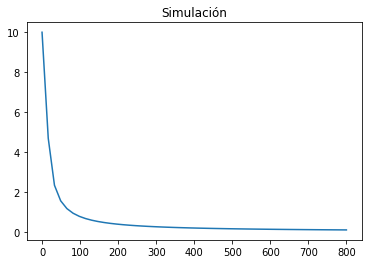

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
def dx(x0):
    def cambio(x,t):
        u=-40*x*np.sqrt(x*t*0.5)
        return 2*x*np.exp(2)+0.06*u
    t = np.linspace(0,800)
    x_t = odeint(cambio,x0,t)
    
    plt.plot(t,x_t)
    plt.title('Simulación')
    plt.show()
    
dx(10)

## <font color = red> Problema 9  <font>


Una empresa de transportes gestiona una flota de 60 carros de tres modelos diferentes. 

- Los tipo X generan una media diaria de $ \$15,000$  pesos. y recorren diariamente una media de $400$ kilómetros. 

- Los tipo Black generan diariamente una media de $\$10,000$ pesos y recorren $300$ kilómetros. 

- Los tipo SUV generan diariamente $\$5,000$ pesos y recorren $100$ km. de media.

Diariamente los carros de la empresa transportan un total de $ \$475$ mil pesos y recorren $12500$ km. entre todos. 

¿Cuántos carros gestiona la empresa de cada modelo?

In [45]:
import numpy as np

a=np.array([[1,1,1],[15000,10000,5000],[400,300,100]])
b=np.array([60, 475000,12500])
x=np.linalg.solve(a,b)

print("X:", round(x[0]))
print("Black:", round(x[1]))
print("SUV:", round(x[2]))

X: 5.0
Black: 25.0
SUV: 30.0


## <font color = red> Problema 10  <font>

Ace Novelty recibió un pedido del Magic World Amusement Park de **900 pandas gigantes, 1200 perros San Bernardo y 2000 pájaros grandes.** La dirección Ace decidió que **500 pandas, 800 perros y 1300 pájaros** pueden ser fabricados **en su planta de Los Ángeles**, y el **resto** del pedido podría realizarse **en la planta de Seattle.**

Cada **panda** requiere **1.5** metros cuadradas de felpa, **30** metros cúbicos de relleno y **5** piezas de adorno; cada **perro** requiere **2** metros cuadradas de felpa, **35** metros cúbicos de relleno y **8** piezas de adorno, y cada **pájaro** requiere **2.5** metros cuadrados de felpa, **25** metros cúbicos de relleno y **15** piezas de adorno. La felpa cuesta **\$4.50** por metro cuadrado, el relleno cuesta **\$0.20** por metros cúbico y las piezas de adorno cuestan **\$0.25** por unidad.

a. Calcule la cantidad de cada tipo de material que se debe comprar para cada planta.

b. ¿Cuál es el costo total de materiales empleados en cada planta y el costo total de los materiales usados por Ace Novelty para cubrir el pedido?

| |Felpa|Relleno|Adorno|
|---|---|---|---|
|Pandas|1.50|  30.00|  5.00|
|Perros|2.00|  35.00|  8.00|
|Pájaros|2.50|  25.00|  15.00|


| |Pandas|Perros|Pájaros|
|---|---|---|---|
|L.A|500|800|1300|
|Seattle|400|400|700|

| | |
|---|---|
|Felpa|4.50|
|Relleno|0.20|
|Adorno|0.25|

A=$\left[
 \begin{array}{ccc}
 1.50 & 30.00 & 5.00  \\
 2.00 & 35.00 & 8.00  \\
 2.50 & 25.00 & 15.00 \\
\end{array} 
\right]$,
P=
$\left[
 \begin{array}{ccc}
 500.00 & 800.00 & 1300.00 \\
 400.00 & 400.00 & 700.00  \\
\end{array} 
\right]$,
C=
$\left[
 \begin{array}{c}
 4.5  \\
 0.2  \\
 0.25
\end{array} 
\right]$

In [3]:
# a:La cantidad de cada tipo de material para cada planta,


In [4]:
#b:El costo total de los materiales para cada planta está dada por


In [5]:
#Costo total


## <font color = red> Problema 10  <font>

Aproxima la función exponencial con n=20

$$e^x =\sum_{n=0}^{20} \frac{x^n}{n!}$$

In [47]:
import math
a=0
x=2

for i in range(20):
    a=a+(x**i)/math.factorial(i)
    
print("Tomando x=2 \n")
print("e^2 =", math.e**x)
print("Aproximacion con sumatoria:", a)

Tomando x=2 

e^2 = 7.3890560989306495
Aproximacion con sumatoria: 7.3890560989301735


## <font color = red> Problema 11  <font>
    
### Construir una cisterna rectangular

Se va a construir una cisterna rectangular con base y tapa cuadradas para almacenar **$12000pies^3$** de agua. Si el concreto para construir la base y los lados tiene un costo de **$100$ por $pie^2$** y el material para construir la **tapa** cuesta **$200$ por $pie^2$** 

¿cuáles son las dimensiones de la cisterna que minimizan el costo de su construcción?

¿Qué se quiere en el problema?

Determinar las dimensiones de la cisterna que minimizan el costo de su construcción.
Suponiendo que las dimensiones de la cisterna son: 
$x$ pies el lado de la base cuadrada y $h$ pies su altura.

¿Cuál es el costo de su construcción?

![](cisterna.png)

Para encontrar las dimensiones ($x$ & $h$) que minimizan el costo de su construcción se necesita la expresión del costo de la cisterna. Usamos la tabla siguiente:

![](tablacisterna.png)

El costo total de la contrucción de la cisterna es:

$$ C = 300x^2 + 400xh \text{   pesos}$$

En el problema aparece la siguiente restricción: **el volumen de la cisterna debe ser igual a $12 000 pies^3$, es decir, que $x^2h = 12000$.**

Tenemos pues:

Una función $C = 300x^2 + 400xh$ y una ecuación $x^2h = 12 000$.
De la ecuación despejamos una de las variables (la que más convenga) para sustituirla en la función. Conviene despejar $h$.

## <font color = red> Problema 12  <font>
    

Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente.

¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?


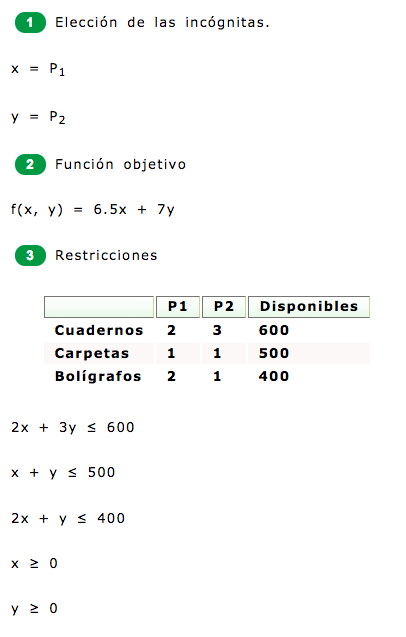

In [72]:
#x: array([150., 100.])

## <font color = red> Problema 13 <font>
    
Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €.

¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

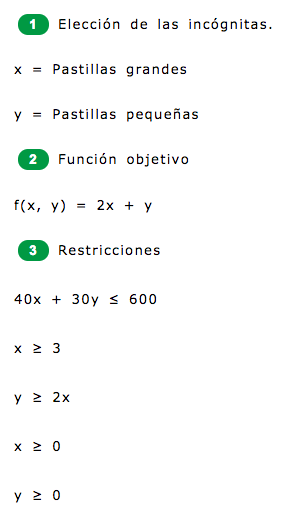

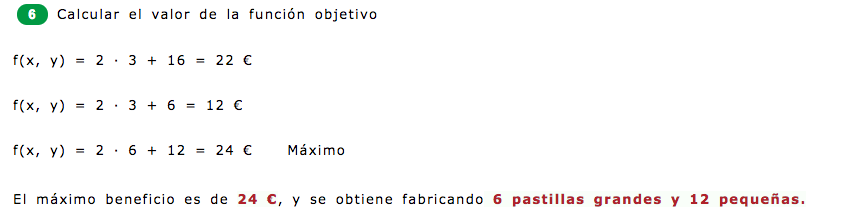

In [6]:
#x: array([ 6., 12.])

## <font color = red> Problema 14 <font>

El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

### Input variables

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)


### Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
import os
import pandas as pd

banking = pd.read_csv('banking.csv')
print(banking.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [6]:
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [7]:
#score = 0.9106293095076236